In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from douglas_rachford import DRSolver

## Load photo:

(-0.5, 1279.5, 1279.5, -0.5)

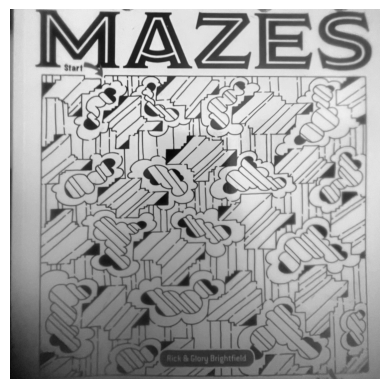

In [2]:
img = cv2.imread('../data/phone_img.jpeg', cv2.IMREAD_GRAYSCALE)
img = img / 255.0

plt.imshow(img, cmap='gray')
plt.axis('off')

## Load cell phone's PSFs and create weights:

In [3]:
psfs = np.load('../psf_calib/phone_psf.npy')

In [4]:
H, W = img.shape

U = np.zeros((H,W,9))

img_y = np.linspace(-1, 1, H)
img_x = np.linspace(-1, 1, W)
img_xx, img_yy = np.meshgrid(img_x, img_y)
x = np.linspace(-1, 1, 3)
y = np.linspace(-1, 1, 3)
xx, yy = np.meshgrid(x, y)
for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        dist = np.sqrt((img_xx - xx[i,j])**2 + (img_yy - yy[i,j])**2)
        U[:,:,idx] = np.exp(-7 * dist**2)
        
U_sum = U.sum(axis=2, keepdims=True)
U = U / U_sum

## Run DR-TV

In [8]:
# The image and kernel information
# b = random_blurred 
# K = random_gaussian_psfs
# U = random_gaussian_weights
b = img 
K = psfs
U = U

# Optimization hyperparameters
lmda = 0.05
beta = 1.0
tau = 0.3
over_relax = 1

# logging losses
log = True

solver = DRSolver(b, K, U, lmda, beta, tau, over_relax, log, img_og=img)

In [9]:
deblurred = solver.solve(n_iters = 100)

100%|██████████| 100/100 [04:37<00:00,  2.78s/it]


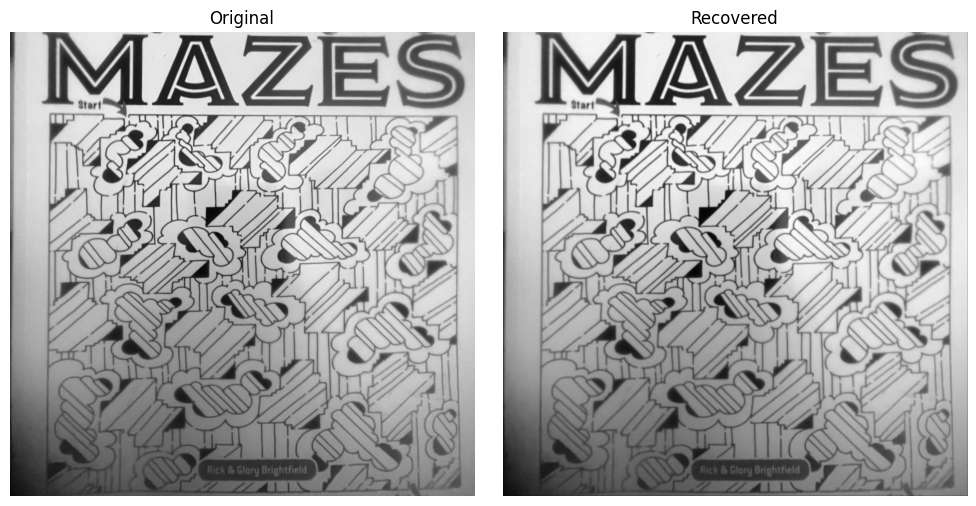

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(img, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(deblurred, cmap='gray')
ax2.set_title('Recovered')
ax2.axis('off')

plt.tight_layout()
plt.show()

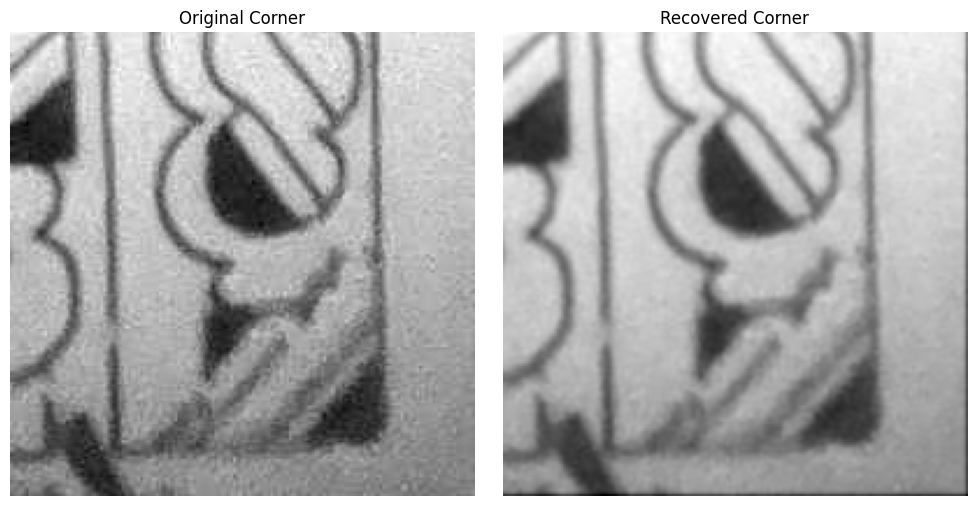

In [13]:
window = 200
h, w = img.shape
corner_orig = img[h-window:h, w-window:w]
corner_rec = deblurred[h-window:h, w-window:w]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(corner_orig, cmap='gray')
ax1.set_title('Original Corner')
ax1.axis('off')

ax2.imshow(corner_rec, cmap='gray')
ax2.set_title('Recovered Corner') 
ax2.axis('off')

plt.tight_layout()
plt.show()